## Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [3]:
#Read csv
df1 = pd.read_csv('boston2017.csv')
df2 = pd.read_csv('boston2018.csv')
df3 = pd.read_csv('boston2019.csv')
df4 = pd.read_csv('boston2020.csv')
df5 = pd.read_csv('boston2021.csv')

/var/folders/q6/y1570qd146q_h_cy44rd1qfr0000gn/T/ipykernel_18930/1295826161.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('boston2019.csv')
/var/folders/q6/y1570qd146q_h_cy44rd1qfr0000gn/T/ipykernel_18930/1295826161.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('boston2020.csv')
/var/folders/q6/y1570qd146q_h_cy44rd1qfr0000gn/T/ipykernel_18930/1295826161.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv('boston2021.csv')


## Data cleaning/preprocessing

In [4]:
frames = [df1,df2,df3,df4,df5] #join year wise data together in a single dataframe
df = pd.concat(frames)

In [5]:
df.shape

(430025, 17)

In [6]:
df.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192074488,619,Larceny,LARCENY ALL OTHERS,C11,351,NaN,2017-08-23 00:00:00,2017,8,Wednesday,0,Part One,ADAMS ST,42.300605,-71.059230,"(42.30060526, -71.05923027)"
1,I192073511,1107,Fraud,FRAUD - IMPERSONATION,B3,435,NaN,2017-02-21 00:01:00,2017,2,Tuesday,0,Part Two,ARMANDINE ST,42.284315,-71.074108,"(42.28431486, -71.07410838)"
2,I192073187,2629,Harassment,HARASSMENT,C6,231,NaN,2017-07-13 00:00:00,2017,7,Thursday,0,Part Two,E FIFTH ST,42.333989,-71.032606,"(42.33398889, -71.03260574)"
3,I192072907,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D4,171,NaN,2017-09-01 16:32:00,2017,9,Friday,16,Part Two,HARRISON AVE,42.335119,-71.074917,"(42.33511904, -71.07491710)"
4,I192072900,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,151,NaN,2017-09-01 00:00:00,2017,9,Friday,0,Part Two,WARREN AVE,42.345163,-71.071291,"(42.34516350, -71.07129114)"


In [7]:
df.isnull().sum() #total null value fields for each column

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP     229799
OFFENSE_DESCRIPTION         0
DISTRICT                 3527
REPORTING_AREA              0
SHOOTING               199367
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART               229858
STREET                   5002
Lat                     13458
Long                    13458
Location                    0
dtype: int64

In [8]:
df = df.drop(df[df['DISTRICT'].isnull()].index) #dropping null values of DISTRICT

In [9]:
df = df.drop(df[df['STREET'].isnull()].index) #dropping null values of STREET

In [10]:
df = df.drop(df[df['Lat'].isnull()].index) #dropping null values of Lat
df = df.drop(df[df['Long'].isnull()].index) #dropping null values of Long

In [11]:
df = df.drop(df[df['DISTRICT']=="External"].index) #removing outliers

In [12]:
df['SHOOTING'] = df['SHOOTING'].fillna(0) #missing value treatment

In [13]:
df.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP     187410
OFFENSE_DESCRIPTION         0
DISTRICT                    0
REPORTING_AREA              0
SHOOTING                    0
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART               187462
STREET                      0
Lat                         0
Long                        0
Location                    0
dtype: int64

In [14]:
df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [15]:
df['STREET'] = df['STREET'].str.capitalize() #capitalizing categorical data

In [16]:
df['MONTH'] = df['MONTH'].astype("category") #changing datatype to categorical
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].astype("category")
df['YEAR'] = df['YEAR'].astype("category")

In [17]:
df = df.drop(['OFFENSE_CODE_GROUP'],axis =1) #dropping unwanted columns
df = df.drop(['UCR_PART'],axis =1)

In [18]:
#Convert to datetime to extract date and time
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE']) #changing date-time format

In [19]:
df['DATE'] = df['OCCURRED_ON_DATE'].dt.date #splitting date

In [20]:
df['Time'] = df['OCCURRED_ON_DATE'].dt.time #spltting time

In [21]:
df['Hour'] = df['OCCURRED_ON_DATE'].dt.hour #splitting hour

In [22]:
df.duplicated(['INCIDENT_NUMBER']) #checking for duplicates

0        False
1        False
2        False
4        False
6        False
         ...  
71716    False
71717    False
71718    False
71719    False
71720    False
Length: 352778, dtype: bool

In [23]:
# from operator import itemgetter

# res = dict(sorted(a.items(), key = itemgetter(1), reverse = True)[:5])
  
# # printing result
# print("The top N value pairs are  " + str(res))

#### Get Unique Attribute Count

In [24]:
def get_unique_count(df,colm):
    res = {}
    list1 = df[colm].unique()
    for x in list1:
        res[x] = df[colm].value_counts()[x]
    return res

In [25]:
a = get_unique_count(df,'OFFENSE_CODE')

In [26]:
def assign_categories(colm):
    res = {}
    list1 = df[colm].unique()
    print(list1)
    val = 1
    for x in list1:
        df[colm]=df[colm].replace(to_replace = x,value = val)
        res[x] = val
        val += 1
        print(val)
    return res

In [27]:

#Categorical encoding of DISTRICT values

['C11' 'B3' 'C6' 'D4' 'A7' 'B2' 'D14' 'A1' 'E18' 'E5' 'E13' 'A15']
2
3
4
5
6
7
8
9
10
11
12
13


In [28]:
df.head(5)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location,DATE,Time,Hour
0,I192074488,619,LARCENY ALL OTHERS,1,351,0,2017-08-23 00:00:00,2017,8,Wednesday,0,Adams st,42.300605,-71.059230,"(42.30060526, -71.05923027)",2017-08-23,00:00:00,0
1,I192073511,1107,FRAUD - IMPERSONATION,2,435,0,2017-02-21 00:01:00,2017,2,Tuesday,0,Armandine st,42.284315,-71.074108,"(42.28431486, -71.07410838)",2017-02-21,00:01:00,0
2,I192073187,2629,HARASSMENT,3,231,0,2017-07-13 00:00:00,2017,7,Thursday,0,E fifth st,42.333989,-71.032606,"(42.33398889, -71.03260574)",2017-07-13,00:00:00,0
4,I192072900,1102,FRAUD - FALSE PRETENSE / SCHEME,4,151,0,2017-09-01 00:00:00,2017,9,Friday,0,Warren ave,42.345163,-71.071291,"(42.34516350, -71.07129114)",2017-09-01,00:00:00,0
6,I192072561,614,LARCENY THEFT FROM MV - NON-ACCESSORY,1,341,0,2017-11-09 00:00:00,2017,11,Thursday,0,Hamilton st,42.304186,-71.065549,"(42.30418639, -71.06554861)",2017-11-09,00:00:00,0


In [29]:
df["Time"].unique

<bound method Series.unique of 0        00:00:00
1        00:01:00
2        00:00:00
4        00:00:00
6        00:00:00
           ...   
71716    12:00:00
71717    00:00:00
71718    10:45:00
71719    18:54:00
71720    01:16:00
Name: Time, Length: 352778, dtype: object>

In [30]:
df.to_csv('dataset.csv')

## EDA

### 1. Overall Crime trend

In [31]:
res_year = df.groupby(['DATE']).size().reset_index(name='COUNT')
res_year

,DATE,COUNT
0,2017-01-01,273
1,2017-01-02,195
2,2017-01-03,213
3,2017-01-04,263
4,2017-01-05,256
...,...,...
1821,2021-12-27,149
1822,2021-12-28,129
1823,2021-12-29,147
1824,2021-12-30,134


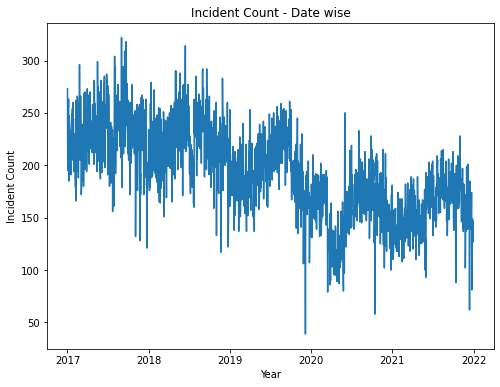

In [32]:
plt_1 = plt.figure(figsize=(8, 6))
plt.plot(res_year['DATE'],res_year['COUNT'])
#plt.xticks([2017,2018,2019,2020,2021])
plt.title("Incident Count - Date wise")
plt.xlabel('Year')
plt.ylabel('Incident Count')
plt.show()

## 2. Seasonality trend(Month)

In [32]:
res_month = df.groupby(['MONTH']).size().reset_index(name='COUNT')
res_month

,MONTH,COUNT
0,1,29098
1,2,26212
2,3,28627
3,4,27542
4,5,29166
5,6,31150
6,7,30435
7,8,33209
8,9,31766
9,10,30462


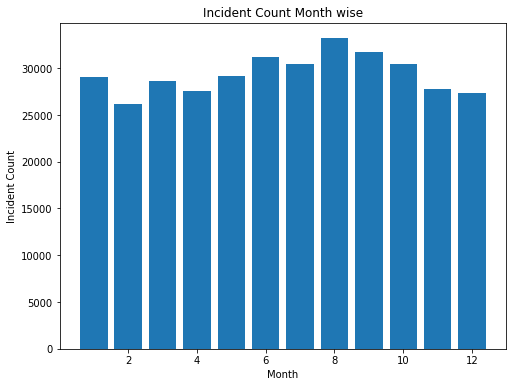

In [33]:
plt_2 = plt.figure(figsize=(8, 6))
plt.bar(res_month['MONTH'],res_month['COUNT'])
#plt.ticklabel_format(style = 'plain', axis='y')
#plt.xticks(rotation ='vertical')
plt.title("Incident Count Month wise")
plt.xlabel('Month')
plt.ylabel('Incident Count')
plt.show()

## 3. Crime count District wise

In [34]:
res_district = df.groupby(['DISTRICT']).size().reset_index(name='COUNT')
res_district

,DISTRICT,COUNT
0,1,46900
1,2,40196
2,3,26732
3,4,44984
4,5,14906
5,6,53794
6,7,23449
7,8,38008
8,9,20544
9,10,15924


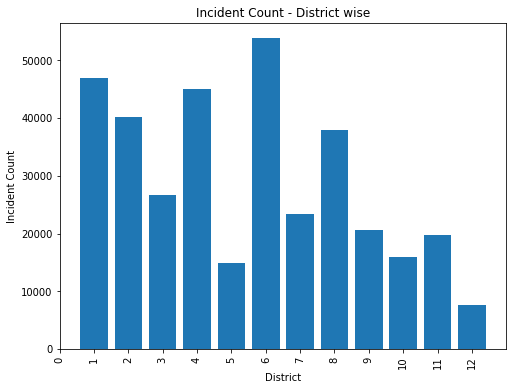

In [35]:
plt_3 = plt.figure(figsize=(8, 6))
plt.bar(res_district['DISTRICT'],res_district['COUNT'])
#plt.ticklabel_format(style = 'plain', axis='y')
plt.xticks(range(13),rotation ='vertical')
plt.title("Incident Count - District wise")
plt.xlabel('District')
plt.ylabel('Incident Count')
plt.show()

## 4. Incident count Day wise 

In [36]:
res_days = df.groupby(['DAY_OF_WEEK']).size().reset_index(name='COUNT')
res_days

,DAY_OF_WEEK,COUNT
0,Friday,53504
1,Monday,50899
2,Saturday,49316
3,Sunday,45162
4,Thursday,51206
5,Tuesday,50838
6,Wednesday,51853


([<matplotlib.patches.Wedge at 0x15cc46430>,
 [Text(0.9774819248471835, 0.5045087577010386, 'Friday'),
  Text(0.1802301204751996, 1.085134601638661, 'Monday'),
  Text(-0.7317979952937091, 0.8212622565807519, 'Saturday'),
  Text(-1.0999986180188197, 0.0017436618614737592, 'Sunday'),
  Text(-0.7205110022625593, -0.8311822276845208, 'Thursday'),
  Text(0.21264268123573926, -1.0792511710055617, 'Tuesday'),
  Text(0.9847936387049147, -0.490083145156344, 'Wednesday')],
 [Text(0.5331719590075545, 0.2751865951096574, '15.2%'),
  Text(0.09830733844101795, 0.591891600893815, '14.4%'),
  Text(-0.39916254288747766, 0.4479612308622283, '14.0%'),
  Text(-0.5999992461920833, 0.0009510882880765958, '12.8%'),
  Text(-0.39300600123412316, -0.4533721241915567, '14.5%'),
  Text(0.11598691703767594, -0.5886824569121244, '14.4%'),
  Text(0.537160166566317, -0.2673180791761876, '14.7%')])

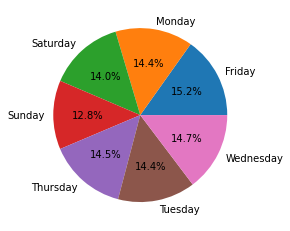

In [37]:
plt.pie(res_days['COUNT'], labels = res_days['DAY_OF_WEEK'], autopct='%1.1f%%')

## 5. Peak time of crimes

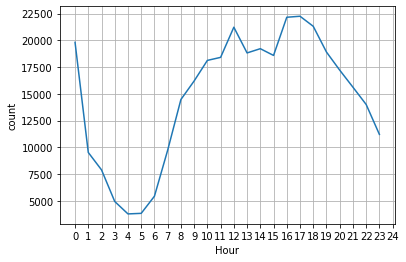

In [38]:
res_hour = df.groupby(['Hour']).size().reset_index(name='COUNT')
#res_hour
plt.xticks(range(25))
plt.grid()
plt.xlabel('Hour')
plt.ylabel('count')
plt.plot(res_hour['Hour'],res_hour['COUNT'])

## 6. Visualising crimes over all Districts

In [40]:
vis = df.groupby(['Lat','Long','DISTRICT']).size().reset_index(name='COUNT')
vis

,Lat,Long,DISTRICT,COUNT
0,-1.000000,-1.000000,1,1
1,-1.000000,-1.000000,2,1
2,-1.000000,-1.000000,3,39
3,-1.000000,-1.000000,4,1
4,-1.000000,-1.000000,5,4
...,...,...,...,...
50432,42.394484,-71.067160,12,2
50433,42.395041,-71.010177,5,6
50434,42.395042,-71.010177,5,17
50435,42.395042,-71.010177,5,4


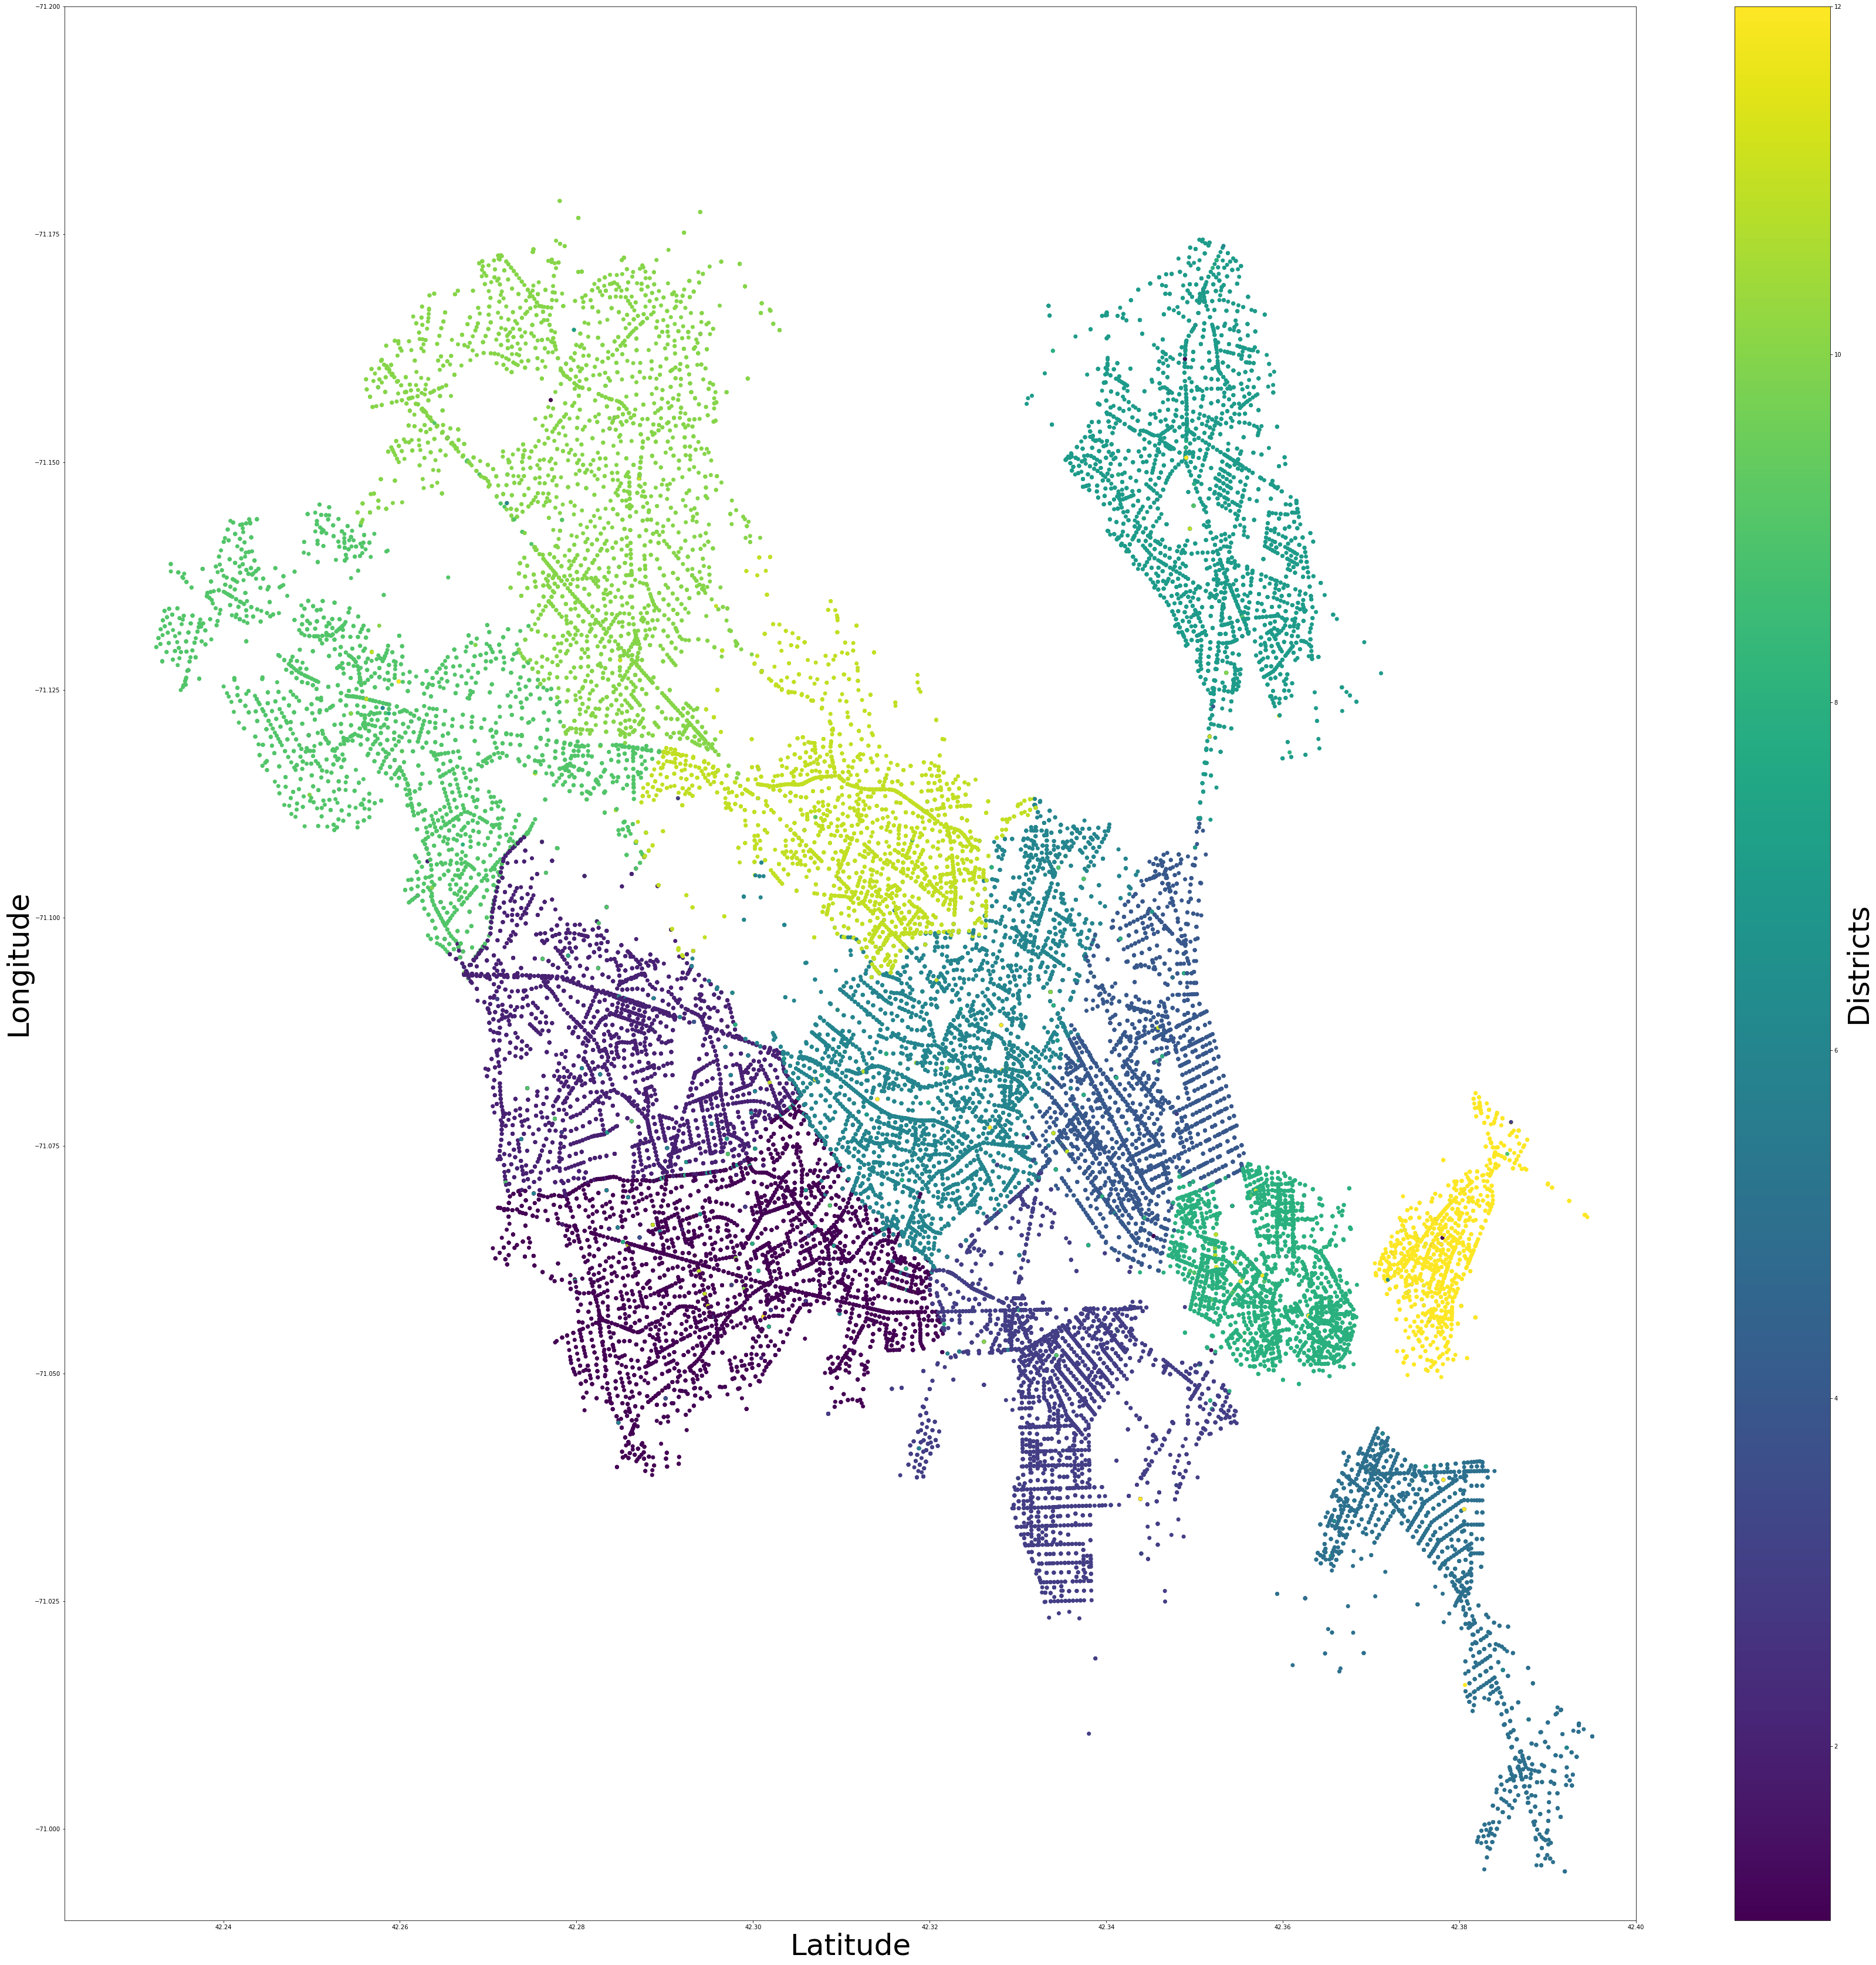

In [41]:
plt.figure(figsize = (60,60))
plt.scatter(vis['Lat'],vis['Long'], c = vis['DISTRICT'])
k = plt.colorbar(orientation='vertical')
k.set_label('Districts',size = 50)
plt.xlim(42.222,42.400)
plt.ylim(-70.99,-71.20)
plt.xlabel('Latitude',size = 50)
plt.ylabel('Longitude',size=50)
plt.size = 1


## 7. Year-wise highest crime occuring months

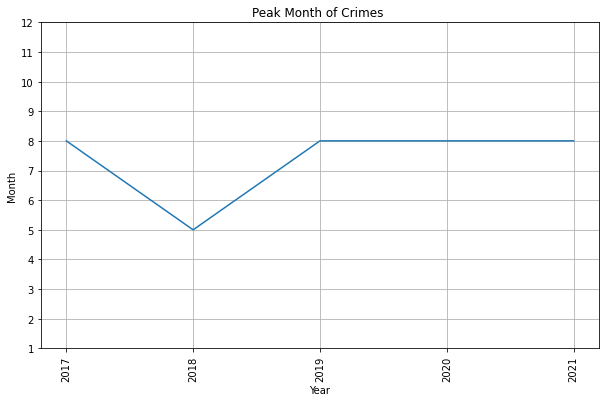

In [43]:
max_month = df.groupby(['YEAR','MONTH']).size().reset_index(name='COUNT')
peak_month = max_month.loc[max_month.groupby("YEAR")["COUNT"].idxmax()]
peak_month
years = [2017,2018,2019,2020,2021]
plt_1 = plt.figure(figsize=(10, 6))
plt.plot(peak_month['YEAR'],peak_month['MONTH'])
plt.ticklabel_format(style = 'plain', axis='y')
plt.xticks(years,rotation ='vertical')
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title("Peak Month of Crimes ")
plt.xlabel('Year')
plt.ylabel('Month')
plt.grid()
plt.show()

## 8. Correlation of crimes occured monthly over the years

<AxesSubplot:xlabel='YEAR', ylabel='MONTH'>

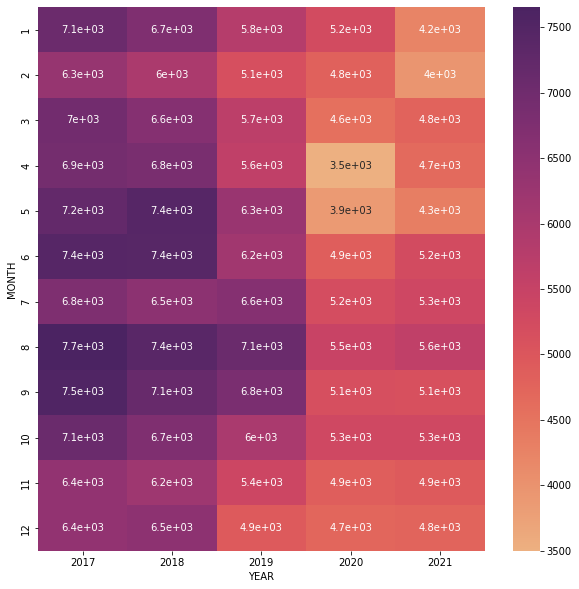

In [44]:
import seaborn as sns
pt = max_month.pivot_table(index="MONTH",columns="YEAR",values="COUNT", aggfunc="sum").fillna(0)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.color_palette("crest", as_cmap=True)
# Sample figsize in inches
sns.heatmap(pt, cmap="flare",annot=True)

## 9. Top 10 crime cate

In [45]:
res_offense = df.groupby(['OFFENSE_DESCRIPTION']).size().reset_index(name='COUNT')
res_offense = res_offense.sort_values(['COUNT'], ascending=[False])
res_offense = res_offense.reset_index(drop=True)
most_common_offense = res_offense.iloc[:10]
least_offense_cat = res_offense.iloc[-10:]
most_common_offense
temp = df.groupby(['OFFENSE_DESCRIPTION', 'YEAR']).size().reset_index(name='COUNT')
temp
years = [2017,2018,2019,2020,2021]
res_of = pd.DataFrame()
res_temp = most_common_offense.copy()
for x in years:
    for i in range(0,10):
        print(i)
        res_of = res_of.append(temp.loc[(temp['OFFENSE_DESCRIPTION']==most_common_offense["OFFENSE_DESCRIPTION"].iloc[i]) &(temp['YEAR'] == x)])
    print(res_of)    
    res_temp[x] = res_of['COUNT'].values
    res_of = pd.DataFrame()
    print(x)
res_temp

0
1
2
3
4
5
6
7
8
9
                        OFFENSE_DESCRIPTION  YEAR  COUNT
525                      INVESTIGATE PERSON  2017   5675
1100          SICK/INJURED/MEDICAL - PERSON  2017   5305
650   M/V - LEAVING SCENE - PROPERTY DAMAGE  2017   4050
1180                              VANDALISM  2017   4117
530                    INVESTIGATE PROPERTY  2017   3433
1135                    TOWED MOTOR VEHICLE  2017   3342
1185                         VERBAL DISPUTE  2017   3947
75                 ASSAULT SIMPLE - BATTERY  2017   3811
595                     LARCENY SHOPLIFTING  2017   2169
610   LARCENY THEFT FROM MV - NON-ACCESSORY  2017   2225
2017
0
1
2
3
4
5
6
7
8
9
                        OFFENSE_DESCRIPTION  YEAR  COUNT
526                      INVESTIGATE PERSON  2018   4678
1101          SICK/INJURED/MEDICAL - PERSON  2018   5739
651   M/V - LEAVING SCENE - PROPERTY DAMAGE  2018   3883
1181                              VANDALISM  2018   3561
531                    INVESTIGATE PROPERTY

/var/folders/q6/y1570qd146q_h_cy44rd1qfr0000gn/T/ipykernel_78456/138323698.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res_of = res_of.append(temp.loc[(temp['OFFENSE_DESCRIPTION']==most_common_offense["OFFENSE_DESCRIPTION"].iloc[i]) &(temp['YEAR'] == x)])
/var/folders/q6/y1570qd146q_h_cy44rd1qfr0000gn/T/ipykernel_78456/138323698.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res_of = res_of.append(temp.loc[(temp['OFFENSE_DESCRIPTION']==most_common_offense["OFFENSE_DESCRIPTION"].iloc[i]) &(temp['YEAR'] == x)])
/var/folders/q6/y1570qd146q_h_cy44rd1qfr0000gn/T/ipykernel_78456/138323698.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res_of = res_of.append(temp.loc[(temp['OFFENSE_DESCRIPTION']==most_common_o

,OFFENSE_DESCRIPTION,COUNT,2017,2018,2019,2020,2021
0,INVESTIGATE PERSON,24765,5675,4678,4661,4161,5590
1,SICK/INJURED/MEDICAL - PERSON,19551,5305,5739,4879,1983,1645
2,M/V - LEAVING SCENE - PROPERTY DAMAGE,18694,4050,3883,3991,2938,3832
3,VANDALISM,16010,4117,3561,2915,2695,2722
4,INVESTIGATE PROPERTY,15156,3433,3215,2999,2609,2900
5,TOWED MOTOR VEHICLE,13706,3342,3109,2570,2070,2615
6,VERBAL DISPUTE,13325,3947,3879,2902,1191,1406
7,ASSAULT SIMPLE - BATTERY,11073,3811,4075,3187,0,0
8,LARCENY SHOPLIFTING,10053,2169,2368,1941,1642,1933
9,LARCENY THEFT FROM MV - NON-ACCESSORY,9937,2225,2079,1779,2153,1701


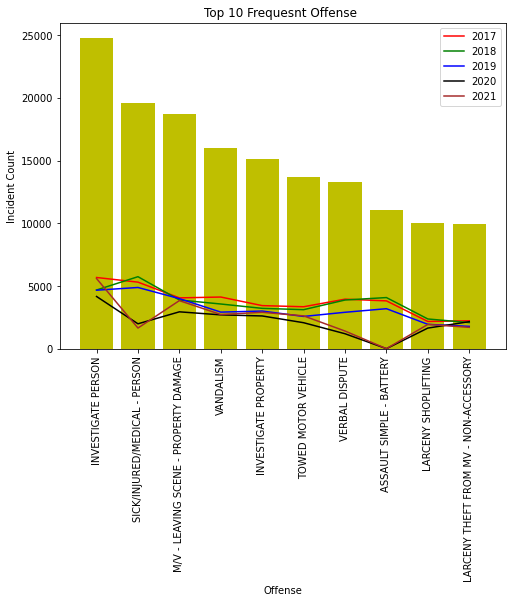

In [350]:
plt_1 = plt.figure(figsize=(8, 6))
plt.bar((res_temp['OFFENSE_DESCRIPTION']),res_temp['COUNT'],color='y')
plt.plot(res_temp['OFFENSE_DESCRIPTION'],res_temp[2017], color='r')
plt.plot(res_temp['OFFENSE_DESCRIPTION'],res_temp[2018], color='g')
plt.plot(res_temp['OFFENSE_DESCRIPTION'],res_temp[2019], color='b')
plt.plot(res_temp['OFFENSE_DESCRIPTION'],res_temp[2020], color='black')
plt.plot(res_temp['OFFENSE_DESCRIPTION'],res_temp[2021], color='brown')
plt.legend(["2017", "2018","2019","2020","2021"], loc ="upper right")

#plt.ticklabel_format(style = 'plain', axis='y')
plt.xticks(rotation ='vertical')
plt.title("Top 10 Frequesnt Offense ")
plt.xlabel('Offense')
plt.ylabel('Incident Count')
plt.show()

In [46]:
res_temp

,OFFENSE_DESCRIPTION,COUNT,2017,2018,2019,2020,2021
0,INVESTIGATE PERSON,24765,5675,4678,4661,4161,5590
1,SICK/INJURED/MEDICAL - PERSON,19551,5305,5739,4879,1983,1645
2,M/V - LEAVING SCENE - PROPERTY DAMAGE,18694,4050,3883,3991,2938,3832
3,VANDALISM,16010,4117,3561,2915,2695,2722
4,INVESTIGATE PROPERTY,15156,3433,3215,2999,2609,2900
5,TOWED MOTOR VEHICLE,13706,3342,3109,2570,2070,2615
6,VERBAL DISPUTE,13325,3947,3879,2902,1191,1406
7,ASSAULT SIMPLE - BATTERY,11073,3811,4075,3187,0,0
8,LARCENY SHOPLIFTING,10053,2169,2368,1941,1642,1933
9,LARCENY THEFT FROM MV - NON-ACCESSORY,9937,2225,2079,1779,2153,1701


## 10. Overall trend

In [35]:
res_year = df.groupby(['YEAR']).size().reset_index(name='COUNT')
res_year

,YEAR,COUNT
0,2017,83839
1,2018,81529
2,2019,71522
3,2020,57591
4,2021,58297


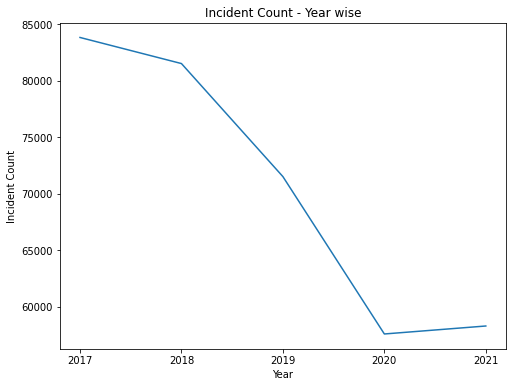

In [48]:
plt_1 = plt.figure(figsize=(8, 6))
plt.plot(res_year['YEAR'],res_year['COUNT'])
plt.xticks([2017,2018,2019,2020,2021])
plt.title("Incident Count - Year wise")
plt.xlabel('Year')
plt.ylabel('Incident Count')
plt.show()